In [1]:
import torch

In [2]:
def activation(x):
    return 1 / (1 + torch.exp(-x))

### 1 Layer

In [3]:
torch.manual_seed(7)

features = torch.randn((1, 5))
weights = torch.randn_like(features)
bias= torch.randn(1, 1)

print(features, weights, bias, sep='\n')

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])
tensor([[0.3177]])


In [4]:
weights = weights.view(5, 1)

print(weights)

tensor([[-0.8948],
        [-0.3556],
        [ 1.2324],
        [ 0.1382],
        [-1.6822]])


In [5]:
y = activation(torch.sum(torch.mm(features, weights)) + bias)

print(torch.mm(features, weights))

tensor([[-1.9796]])


In [6]:
print(y)

tensor([[0.1595]])


### 2 Layers

In [7]:
torch.manual_seed(7)

features = torch.randn((1, 3))
n_input = features.shape[1]
n_hidden = 2
n_output = 1

W1 = torch.randn(n_input, n_hidden)
W2 = torch.randn(n_hidden, n_output)

B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

print(features, W1, W2, B1, B2, sep='\n')

tensor([[-0.1468,  0.7861,  0.9468]])
tensor([[-1.1143,  1.6908],
        [-0.8948, -0.3556],
        [ 1.2324,  0.1382]])
tensor([[-1.6822],
        [ 0.3177]])
tensor([[0.1328, 0.1373]])
tensor([[0.2405]])


In [8]:
h1 = activation(torch.mm(features, W1) + B1)

print(h1)

tensor([[0.6813, 0.4355]])


In [9]:
output = activation(torch.mm(h1, W2) + B2)

print(output)

tensor([[0.3171]])


### Numpy to Torch

In [10]:
import numpy as np

In [11]:
a = np.random.rand(4,3)
print(a)

[[0.53165361 0.98164009 0.29994021]
 [0.93768054 0.24436332 0.32138775]
 [0.18374366 0.85141198 0.95748885]
 [0.98351651 0.54025846 0.61718725]]


In [12]:
torch_a = torch.from_numpy(a)
print(torch_a)

tensor([[0.5317, 0.9816, 0.2999],
        [0.9377, 0.2444, 0.3214],
        [0.1837, 0.8514, 0.9575],
        [0.9835, 0.5403, 0.6172]], dtype=torch.float64)


In [13]:
torch_a.numpy()

array([[0.53165361, 0.98164009, 0.29994021],
       [0.93768054, 0.24436332, 0.32138775],
       [0.18374366, 0.85141198, 0.95748885],
       [0.98351651, 0.54025846, 0.61718725]])

In [14]:
torch_a.mul_(2)

tensor([[1.0633, 1.9633, 0.5999],
        [1.8754, 0.4887, 0.6428],
        [0.3675, 1.7028, 1.9150],
        [1.9670, 1.0805, 1.2344]], dtype=torch.float64)

In [15]:
a

array([[1.06330721, 1.96328018, 0.59988041],
       [1.87536108, 0.48872663, 0.64277551],
       [0.36748731, 1.70282395, 1.9149777 ],
       [1.96703302, 1.08051692, 1.23437449]])

### Pytorch without NN Module

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [17]:
import matplotlib.pyplot as plt

In [18]:
# Load the MNIS dataset
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize([0.5], [0.5]),
                               ])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [19]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


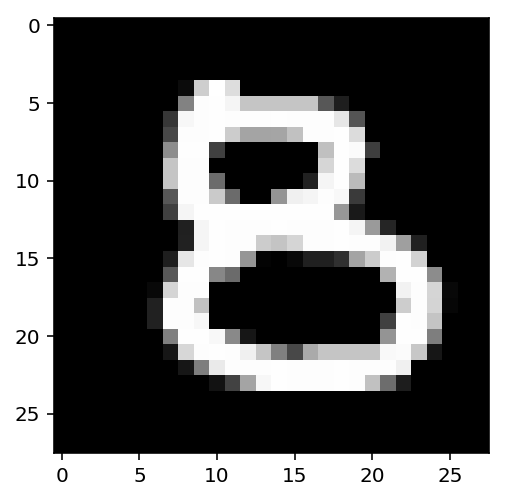

In [20]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [21]:
inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

In [22]:
h1 = activation(torch.mm(inputs, w1) + b1)

output = torch.mm(h1, w2) + b2

In [23]:
print(output.shape)
print(output)

torch.Size([64, 10])
tensor([[ 4.1850e+00,  1.7385e+01, -2.0025e+01, -3.1723e+00, -3.5890e+00,
         -5.5427e-01,  6.3814e+00,  1.2403e+01,  4.3539e-01,  5.4370e+00],
        [-4.7575e+00,  1.5829e+01, -2.2019e+01,  5.1966e+00, -5.0432e-01,
          8.2517e+00,  1.0362e+01,  4.4520e+00,  1.6230e+01,  6.6735e+00],
        [-5.8159e+00,  2.0752e+01, -1.4510e+01, -4.0851e+00,  1.2044e+01,
         -5.2770e+00,  1.5019e+01,  6.0332e+00,  2.6487e+00,  4.7284e+00],
        [-6.5565e-02,  9.0499e+00, -6.1621e+00, -8.0228e+00,  8.4912e-01,
         -1.2533e+01,  5.8463e+00,  1.1087e+01,  8.1131e+00, -1.1102e+00],
        [-1.0341e+01,  7.8912e+00, -1.3880e+01,  3.2861e+00,  5.5803e+00,
          5.1073e+00,  1.1375e+01,  7.1374e+00,  1.2983e+01, -4.1446e+00],
        [-8.7998e+00,  1.2696e+01, -9.1019e+00, -3.2297e+00,  1.3302e+01,
         -5.5572e+00,  1.9638e+01,  1.2058e+01,  2.7587e+00, -9.6813e-01],
        [-4.3998e+00,  9.7839e+00, -9.3046e+00, -5.2474e-01,  1.3046e+01,
          9

         -2.9867e+00,  1.4047e+01,  1.0164e+01,  1.3768e+01,  3.0494e+00]])


In [24]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [25]:
probabilities = softmax(output)
print(probabilities.shape)

torch.Size([64, 10])


In [26]:
print(probabilities.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [27]:
probabilities[0]

tensor([1.8370e-06, 9.9316e-01, 5.6201e-17, 1.1719e-09, 7.7251e-10, 1.6065e-08,
        1.6519e-05, 6.8132e-03, 4.3220e-08, 6.4247e-06])

### Pytorch with NN Module

In [28]:
from torch import nn

In [29]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [30]:
# Alternative way to define the Network class: Use Functional module
import torch.nn.functional as F

class Network2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [31]:
class Network3(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu(x)
        
        x = self.hidden2(x)
        x = self.relu(x)
        
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [32]:
model = Network3()
model

Network3(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

### Loss Calculation

In [33]:
# Load the MNIS dataset
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize([0.5], [0.5]),
                               ])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [34]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10))

# Loss criteria: Cross Entropy
criterion = nn.CrossEntropyLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

In [35]:
# Forward propagate
preds = model(images)

# Calculate loss
loss = criterion(preds, labels)

print(loss)

tensor(2.2957, grad_fn=<NllLossBackward>)


In [36]:
# Exercise 2: Using Log-Softmax
model2 = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

preds2 = model2(images)
loss2 = criterion(preds2, labels)

print(loss2)

tensor(2.3260, grad_fn=<NllLossBackward>)


### Backpropagation with Autograd

In [37]:
x = torch.randn(2, 2, requires_grad=True)
print(x)

tensor([[-1.4002, -1.8795],
        [ 1.9034,  0.6671]], requires_grad=True)


In [38]:
y = x ** 2
print(y)

tensor([[1.9604, 3.5326],
        [3.6228, 0.4450]], grad_fn=<PowBackward0>)


In [39]:
print(y.grad_fn)

In [40]:
z = y.mean()
print(z)

tensor(2.3902, grad_fn=<MeanBackward0>)


In [41]:
print(x.grad)

None


In [42]:
# Backprop
z.backward()
print(x.grad)

# The same as
print(x / 2)

tensor([[-0.7001, -0.9398],
        [ 0.9517,  0.3335]])
tensor([[-0.7001, -0.9398],
        [ 0.9517,  0.3335]], grad_fn=<DivBackward0>)


In [43]:
# On the model
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logpreds = model(images)
loss = criterion(logpreds, labels)

print(loss)

tensor(2.2958, grad_fn=<NllLossBackward>)


In [44]:
print('Before backpropagation: \n', model[0].weight.grad)

Before backpropagation: 
 None


In [45]:
loss.backward()

In [46]:
print('After back propagation: \n', model[0].weight.grad)

After back propagation: 
 tensor([[ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        ...,
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016]])


### Optimization

In [47]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)

### Training the Model

In [48]:
print('Initial weights: ', model[0].weight)

Initial weights:  Parameter containing:
tensor([[ 0.0122,  0.0106,  0.0017,  ..., -0.0092, -0.0297,  0.0221],
        [-0.0111, -0.0243, -0.0153,  ...,  0.0297,  0.0348, -0.0254],
        [ 0.0143,  0.0279,  0.0094,  ..., -0.0159, -0.0128, -0.0353],
        ...,
        [-0.0195,  0.0352,  0.0307,  ..., -0.0286,  0.0237, -0.0312],
        [-0.0187,  0.0096,  0.0092,  ...,  0.0052,  0.0221,  0.0174],
        [-0.0354,  0.0223, -0.0132,  ..., -0.0032,  0.0292, -0.0199]],
       requires_grad=True)


In [49]:
images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients first, because this accumulates
optimizer.zero_grad()

# Forward propagate then calculate the loss
output = model.forward(images)
loss = criterion(output, labels)

# Backward propagate
loss.backward()
print('Gradient: ', model[0].weight.grad)

Gradient:  tensor([[-7.4859e-05, -7.4859e-05, -7.4859e-05,  ..., -7.4859e-05,
         -7.4859e-05, -7.4859e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 9.6640e-04,  9.6640e-04,  9.6640e-04,  ...,  9.6640e-04,
          9.6640e-04,  9.6640e-04],
        ...,
        [-1.2626e-03, -1.2626e-03, -1.2626e-03,  ..., -1.2626e-03,
         -1.2626e-03, -1.2626e-03],
        [-2.7242e-03, -2.7242e-03, -2.7242e-03,  ..., -2.7242e-03,
         -2.7242e-03, -2.7242e-03],
        [-3.3611e-04, -3.3611e-04, -3.3611e-04,  ..., -3.3611e-04,
         -3.3611e-04, -3.3611e-04]])


In [50]:
# Optimize the parameters (weights)
optimizer.step()

print('Updated weights: ', model[0].weight)

Updated weights:  Parameter containing:
tensor([[ 0.0122,  0.0106,  0.0017,  ..., -0.0092, -0.0297,  0.0221],
        [-0.0111, -0.0243, -0.0153,  ...,  0.0297,  0.0348, -0.0254],
        [ 0.0143,  0.0279,  0.0094,  ..., -0.0160, -0.0128, -0.0353],
        ...,
        [-0.0195,  0.0352,  0.0307,  ..., -0.0286,  0.0237, -0.0312],
        [-0.0187,  0.0096,  0.0092,  ...,  0.0052,  0.0222,  0.0174],
        [-0.0353,  0.0223, -0.0132,  ..., -0.0032,  0.0292, -0.0199]],
       requires_grad=True)


### Training the model with the complete dataset (with epochs)

In [51]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5

for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        # Forward propagate
        predictions = model.forward(images)
        
        # Calculate loss
        loss = criterion(predictions, labels)
        running_loss += loss.item()
        
        # Back propagate
        loss.backward()
        
        # Optimize the parameters
        optimizer.step()
    
    else:
        print(f'training loss: {running_loss / len(trainloader)}')
        

training loss: 2.002747079965148
training loss: 0.9224156597529901
training loss: 0.5305709021050793
training loss: 0.43088498117445884
training loss: 0.38643559381397546


In [52]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

'wget' is not recognized as an internal or external command,
operable program or batch file.


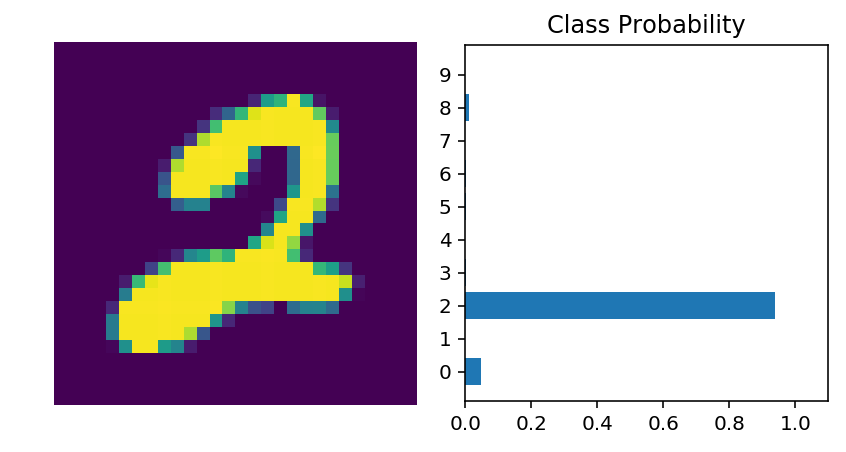

In [56]:
# Visualizing the results
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
with torch.no_grad():
    preds = model.forward(img)
    
ps = F.softmax(preds, dim=1)
    
helper.view_classify(img.view(1, 28, 28), ps)